In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import gensim
import numpy as np
from gensim.models import Word2Vec
from time import time  # To time our operations
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

data = pd.read_json("preprocessingDoneRight.json")

C:\Users\gneur\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


35137


<function matplotlib.pyplot.show(*args, **kw)>

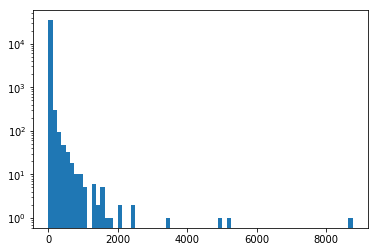

In [2]:
stemmed_words = pd.Series(' '.join(data['modded1']).split()).value_counts()
print(len(stemmed_words))
plt.hist(stemmed_words.values,bins=70,log=True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

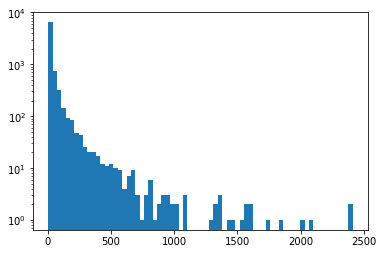

In [3]:
stemmed_words = stemmed_words[stemmed_words > 3]
stemmed_words = stemmed_words[stemmed_words < 3000]
plt.hist(stemmed_words.values,bins=70,log=True)
plt.show

data['m'] = data['modded1'].apply(lambda x: " ".join(x for x in x.split() if x in stemmed_words))
pd.Series(' '.join(data['m']).split()).value_counts()
sentences = data[data["year"] == 2016]["m"].tolist()


In [4]:
sentences = data[data["year"] == 2016]["modded1"].tolist()

In [5]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[i]) for i, _d in enumerate(sentences)]
tagged_data

[TaggedDocument(words=['foxnews', 'live', 'members', 'family', '1150', 'pm', 'ring', 'new', 'year', 'together', 'make', 'america', 'great'], tags=[0]),
 TaggedDocument(words=['happy', 'new', 'year', 'amp', 'thank'], tags=[1]),
 TaggedDocument(words=['happy', 'new', 'year', 'thank', 'great', 'family', 'support'], tags=[2]),
 TaggedDocument(words=['jallenaip', 'hillary', 'said', 'fog', 'war', 'explanation', 'lies', 'benghazi', 'fog', 'allowed', 'wh', 'vote', 'trump', 'potus'], tags=[3]),
 TaggedDocument(words=['sprinklermanus', 'cnn', 'realdonaldtrump', 'theyre', 'spending', 'millions', 'youre', 'still', 'going', 'win', 'go', 'donald', 'trump'], tags=[4]),
 TaggedDocument(words=['well', 'year', 'officially', 'begun', 'many', 'stops', 'planned', 'working', 'hard', 'win', 'turn', 'country', 'around'], tags=[5]),
 TaggedDocument(words=['marie7777777777', 'realdonaldtrump', 'love', 'u', 'trump', 'family', 'god', 'bless'], tags=[6]),
 TaggedDocument(words=['jodil792', 'standing', 'spreading',

In [6]:
tagged_data[0][0]

['foxnews',
 'live',
 'members',
 'family',
 '1150',
 'pm',
 'ring',
 'new',
 'year',
 'together',
 'make',
 'america',
 'great']

In [7]:
#model = Doc2Vec(vector_size=50, min_count=2, epochs=40)
#model = Doc2Vec(vector_size=100, min_count=2, epochs=40)
#model = Doc2Vec(vector_size=200, min_count=2, epochs=40)
model = Doc2Vec(vector_size=300, min_count=2, epochs=40)

model.build_vocab(tagged_data)


In [8]:
%time model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)


Wall time: 18.2 s


In [9]:
model.infer_vector(['mexico',"wall"])


array([-0.00890159, -0.01966872, -0.01991268, -0.0033236 , -0.00437293,
        0.07344609, -0.01229658, -0.0034096 ,  0.10093934,  0.00490823,
        0.01670344, -0.008912  , -0.03804389, -0.03555831,  0.02263975,
       -0.09871357,  0.00636616,  0.10732373,  0.03744937,  0.0020754 ,
        0.0315246 , -0.06068437, -0.04453985,  0.02262503,  0.01443417,
       -0.03647324,  0.0674319 , -0.06860849, -0.02429182, -0.02939509,
        0.04431448,  0.04444134, -0.02249291, -0.01807499, -0.05762776,
       -0.02594064,  0.04655328,  0.01277424,  0.07375649,  0.00471285,
       -0.01429868, -0.04318147, -0.02709848,  0.08688736,  0.01702159,
       -0.05282645,  0.06973464, -0.00027847, -0.05372794, -0.01817382,
       -0.02129026,  0.04724326,  0.03359406, -0.04851593,  0.05181072,
       -0.09976462,  0.01041616, -0.03581687, -0.00731316,  0.11178596,
       -0.0605622 ,  0.06437203,  0.01001063, -0.04532339, -0.02758425,
       -0.03882327, -0.03367606, -0.00062786,  0.03412407,  0.01

In [10]:
ranks = []
second_ranks = []
for doc_id in range(len(tagged_data)):
    inferred_vector = model.infer_vector(tagged_data[doc_id].words)
    sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)
    
    second_ranks.append(sims[1])


C:\Users\gneur\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [11]:
import collections

collections.Counter(ranks)  # Results vary between runs due to random seeding and very small corpus


Counter({0: 2027,
         3: 135,
         7: 62,
         5: 73,
         1: 466,
         13: 33,
         11: 34,
         4: 115,
         15: 28,
         20: 14,
         2: 240,
         62: 4,
         17: 30,
         10: 38,
         43: 3,
         8: 45,
         191: 1,
         12: 37,
         1303: 1,
         1174: 1,
         44: 5,
         31: 10,
         18: 23,
         27: 10,
         727: 1,
         46: 8,
         39: 11,
         32: 3,
         457: 1,
         35: 7,
         120: 3,
         19: 16,
         87: 5,
         49: 8,
         26: 19,
         30: 8,
         344: 1,
         82: 2,
         1358: 1,
         264: 2,
         65: 4,
         348: 1,
         24: 14,
         923: 1,
         1991: 1,
         42: 7,
         6: 60,
         40: 6,
         38: 11,
         56: 3,
         872: 1,
         2238: 1,
         119: 2,
         25: 7,
         2947: 1,
         52: 8,
         148: 1,
         21: 11,
         9: 46,
         69

In [12]:
print('Document ({}): «{}»\n'.format(doc_id, ' '.join(tagged_data[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0), ('SECOND-MOST', 1), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]: 
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(tagged_data[sims[index][0]].words)))


Document (4208): «rt realdonaldtrump happy birthday donaldjtrumpjr»

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec(dm/m,d300,n5,w5,mc2,s0.001,t3):

MOST (4208, 0.9713025093078613): «rt realdonaldtrump happy birthday donaldjtrumpjr»

SECOND-MOST (3407, 0.9682043790817261): «rt gop timkaines words debates2016»

MEDIAN (1975, 0.5398378372192383): «obama va secretary said shouldnt measure wait times hillary says va problems widespread take care vets»

LEAST (1160, -0.7365309000015259): «clinton sanders people disrupted rally chicago say must talk people phony politicians»



In [13]:
X = []
for i in range(0,len(tagged_data)):
    X.append( model.infer_vector(tagged_data[i].words))

In [14]:
from sklearn.metrics import silhouette_score
from nltk.cluster import KMeansClusterer
import nltk

#stemmed
#0.112 8 cluster 
#0.12 8 cluster con lunghezza vettore 100
#0.135 8 cluster con lunghezza vettore 200
#0.133 8 cluster con lunghezza vettore 300

#not stemmed
#0.135 8 cluster con lunghezza 100
#0.149 8 cluster con lunghezza 200

#all words not stemmed, no stopwords
#0.114 6 cluster 100
#0.136 8 cluster 100
#0.122 8 cluster 200
#0.144 8 cluster 300

NUM_CLUSTERS=8
%time kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=40)
%time assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print (assigned_clusters)
d = silhouette_score(X, assigned_clusters,metric='cosine')
print(d)

Wall time: 0 ns
Wall time: 19min 12s
0.14413075


In [15]:
datak = data[data["year"] == 2016]
datak["labels"] = assigned_clusters
datak

C:\Users\gneur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,favorite_count,in_reply_to_user_id_str,is_retweet,retweet_count,text,month,year,hour,week_year,date,modded_text,modded1,modded1_stemmed,labels
25967,6735,NaN,False,2108,"I will be on @FoxNews live, with members of m...",1,2016,0,53,2016-01-01,"i will be on @foxnews live, with members of my...",foxnews live members family 1150 pm ring new y...,foxnew live member famili 1150 pm ring ...,4
25968,8581,NaN,False,3460,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/Y...,1,2016,3,53,2016-01-01,happy new year &amp; thank you! https://t.co/y...,happy new year amp thank,happi new year amp thank,3
25970,8258,NaN,False,1948,Happy New Year from #MarALago! Thank you to my...,1,2016,6,53,2016-01-01,happy new year from #maralago! thank you to my...,happy new year thank great family support,happi new year thank great famili support,2
25971,7490,NaN,False,2721,"""@jallenaip: Hillary said she was in a ""Fog of...",1,2016,6,53,2016-01-01,"""@jallenaip: hillary said she was in a ""fog of...",jallenaip hillary said fog war explanation lie...,jallenaip hillari said fog war explan l...,6
25972,3330,NaN,False,933,"""@sprinklermanus: @CNN @realDonaldTrump they'r...",1,2016,21,53,2016-01-01,"""@sprinklermanus: @cnn @realdonaldtrump they'r...",sprinklermanus cnn realdonaldtrump theyre spen...,sprinklermanu cnn realdonaldtrump theyr s...,2
25973,8495,NaN,False,2642,"Well, the year has officially begun. I have ma...",1,2016,23,53,2016-01-01,"well, the year has officially begun. i have ma...",well year officially begun many stops planned ...,well year offici begun mani stop plan ...,7
25974,2780,NaN,False,654,"""@marie7777777777: @realDonaldTrump we love u ...",1,2016,23,53,2016-01-01,"""@marie7777777777: @realdonaldtrump we love u ...",marie7777777777 realdonaldtrump love u trump f...,marie7777777777 realdonaldtrump love u tr...,2
25975,3066,NaN,False,893,"""@JodiL792: We are Standing with you! Spreadin...",1,2016,23,53,2016-01-01,"""@jodil792: we are standing with you! spreadin...",jodil792 standing spreading wordtrump presiden...,jodil792 stand spread wordtrump presid 2...,1
25976,3492,NaN,False,881,"""@MEMEoryHead: I'm one of your biggest fans Mr...",1,2016,23,53,2016-01-01,"""@memeoryhead: i'm one of your biggest fans mr...",memeoryhead im one biggest fans mr trump cant ...,memeoryhead im one biggest fan mr trump...,4
25977,3346,NaN,False,922,"""@CASuperrunner: @georgehenryw Huckabee is a g...",1,2016,23,53,2016-01-01,"""@casuperrunner: @georgehenryw huckabee is a g...",casuperrunner huckabee good manbut needs get b...,casuperrunn huckabe good manbut need get...,4


In [16]:
clusters_wordCount = []
for cluster in range(0,NUM_CLUSTERS):
    c = datak[datak["labels"] == cluster]
   # words = pd.Series(' '.join(c['m']).split()).value_counts()
    words = pd.Series(' '.join(c['modded1']).split()).value_counts()
    m = words.mean()
    words = words[words > m]
    clusters_wordCount.append(words)
    print("Cluster " + str(cluster) + " dimension " + str(len(c)))

Cluster 0 dimension 498
Cluster 1 dimension 644
Cluster 2 dimension 453
Cluster 3 dimension 901
Cluster 4 dimension 308
Cluster 5 dimension 565
Cluster 6 dimension 441
Cluster 7 dimension 399


In [17]:
for c in range(0,NUM_CLUSTERS):
    print("cluster ", c , clusters_wordCount[c][0:10])

cluster  0 hillary      258
clinton      174
crooked      145
bernie        55
bad           47
emails        36
president     33
sanders       28
email         28
media         28
dtype: int64
cluster  1 amp                98
hillary            64
us                 63
people             62
country            54
must               52
realdonaldtrump    48
america            47
great              46
american           46
dtype: int64
cluster  2 trump              188
realdonaldtrump    180
rt                 118
donald              63
president           48
thank               47
great               38
amp                 36
trump2016           30
campaign            25
dtype: int64
cluster  3 thank                    351
trump2016                220
makeamericagreatagain    173
join                     134
great                    129
amp                       92
america                   84
make                      72
tomorrow                  72
new                       68
dtype: 